In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,path,class
0,dataset/ImageDataset/crime/Stealing044_x26498....,crime
1,dataset/ImageDataset/normal/Normal_Videos_924_...,normal
2,dataset/ImageDataset/crime/Stealing006_x26495....,crime
3,dataset/ImageDataset/crime/Stealing031_x26421....,crime
4,dataset/ImageDataset/normal/Normal_Videos_360_...,normal


In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
def getImage(index):
    image = cv2.imread(df.iloc[index, 0])
    plt.title(df.iloc[index, 1]);
    plt.imshow(image);

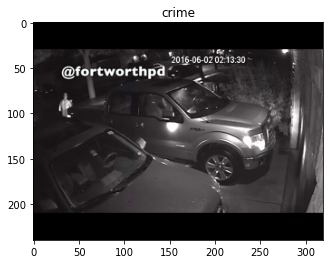

In [5]:
getImage(0)

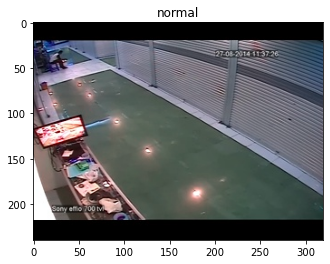

In [6]:
getImage(1)

In [7]:
def getDimensions(index):
    img = cv2.imread(df.iloc[index, 0])
    return img.shape[1], img.shape[0]

In [8]:
minW, minH = 1000, 1000
for i in range(len(df)):
    w, h = getDimensions(i)
    
    if w<minW:
        minW=w
        
    if h<minH:
        minH=h
        
print("minimum width and height: ",(minW, minH))

minimum width and height: (320, 240)


we get minimum width and height as  (320, 240)

In [9]:
def resizeImage(index):
    image=cv2.imread(df.iloc[index,0])
    return cv2.resize(image, (320, 240))

In [10]:
import numpy as np
import pickle

In [11]:
data = []

for i in range(len(df)):
    data.append(resizeImage(i))

data = np.array(data)

In [12]:
partition = int(len(data)/3)

data1, data2, data3 = data[:partition], data[partition:2*partition], data[2*partition:3*partition]

f = open("resized1", "wb")
f.write(pickle.dumps(data1, protocol=4))
f.close()

f = open("resized2", "wb")
f.write(pickle.dumps(data2, protocol=4))
f.close()

f = open("resized3", "wb")
f.write(pickle.dumps(data3, protocol=4))
f.close()

In [13]:
labels=np.array(df['class'])
labels1, labels2, labels3 = labels[:partition], labels[partition:2*partition], labels[2*partition:3*partition]

f = open("labels1", "wb")
f.write(pickle.dumps(labels1, protocol=4))
f.close()

f = open("labels2", "wb")
f.write(pickle.dumps(labels2, protocol=4))
f.close()

f = open("labels3", "wb")
f.write(pickle.dumps(labels3, protocol=4))
f.close()